In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import neuroCombat as nc

In [3]:
data = pd.read_csv("../data/data_trimmed.csv", index_col=0)

In [4]:
data.columns

Index(['AAL_ID', 'Subject_ID', 'Site_ID', 'Site', 'Site_combined', 'CIVET_ID',
       'Subject', 'Project', 'DX_Group', 'DX', 'Age', 'Sex', 'Sex_edit',
       'Group', 'FIQ', 'VIQ', 'PIQ', 'FINAL_MOTION_QC', 'L_thal', 'R_thal',
       'L_GP', 'R_GP', 'L_str', 'R_str', 'L_str_vol', 'L_GP_vol', 'L_thal_vol',
       'R_str_vol', 'R_GP_vol', 'R_thal_vol', 'CSF', 'GM', 'WM', 'TBV',
       'QC_Notes'],
      dtype='object')

count    993.000000
mean      18.175196
std        9.801495
min        4.000000
25%       11.000000
50%       15.300000
75%       24.000000
max       65.000000
Name: Age, dtype: float64


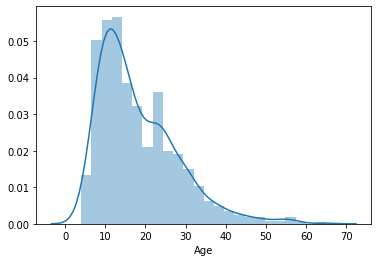

In [5]:
print(data.Age.describe())
sns.distplot(data['Age'])

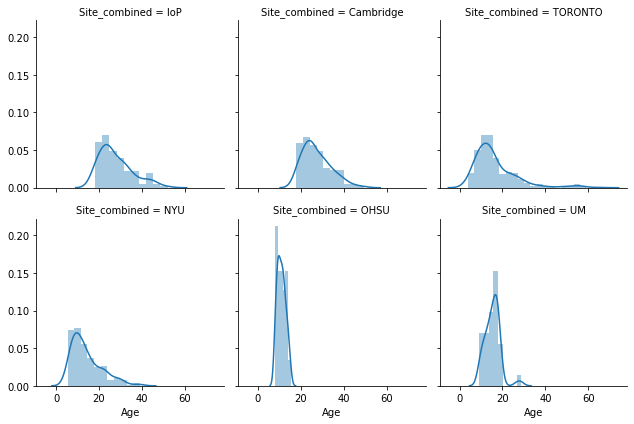

In [6]:
age_fg = sns.FacetGrid(data,col='Site_combined',col_wrap=3)
age_fg.map(sns.distplot, "Age")

In [7]:
data.columns


Index(['AAL_ID', 'Subject_ID', 'Site_ID', 'Site', 'Site_combined', 'CIVET_ID',
       'Subject', 'Project', 'DX_Group', 'DX', 'Age', 'Sex', 'Sex_edit',
       'Group', 'FIQ', 'VIQ', 'PIQ', 'FINAL_MOTION_QC', 'L_thal', 'R_thal',
       'L_GP', 'R_GP', 'L_str', 'R_str', 'L_str_vol', 'L_GP_vol', 'L_thal_vol',
       'R_str_vol', 'R_GP_vol', 'R_thal_vol', 'CSF', 'GM', 'WM', 'TBV',
       'QC_Notes'],
      dtype='object')

In [8]:
data['Site'].unique()

array(['IoP', 'Cambridge', 'TORONTO', 'ABIDEII_NYU', 'ABIDE_NYU',
       'ABIDEII_OHSU', 'ABIDE_OHSU', 'ABIDE_UM'], dtype=object)

In [9]:
data['L_str_vol_norm'] = data['L_str_vol']/data['TBV']
data[['L_str_vol','TBV','L_str_vol_norm']]

,L_str_vol,TBV,L_str_vol_norm
0,10423.00,3120329.80,0.003340
1,12433.00,3540926.04,0.003511
2,11619.00,3608836.80,0.003220
3,11623.00,4181290.36,0.002780
4,9740.00,3036437.24,0.003208
...,...,...,...
1001,7164.21,2022101.46,0.003543
1002,11313.40,3138960.95,0.003604
1003,9955.40,3196888.60,0.003114
1004,11409.60,2876925.68,0.003966


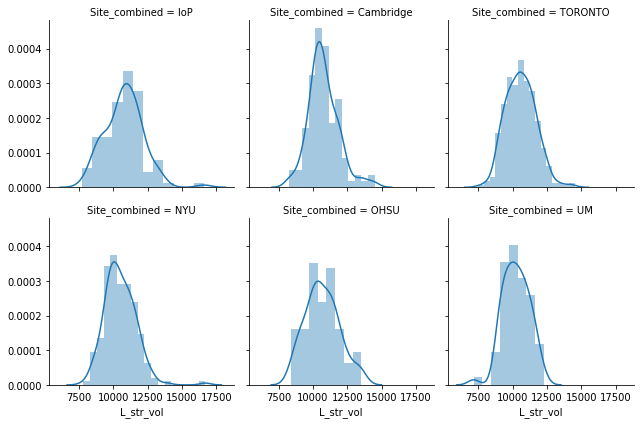

In [10]:
strvol_fg = sns.FacetGrid(data,col='Site_combined',col_wrap=3)
strvol_fg.map(sns.distplot,"L_str_vol")

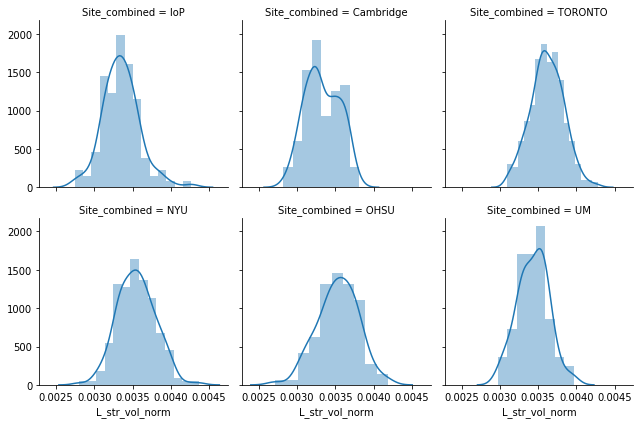

In [11]:
strvol_fg = sns.FacetGrid(data,col='Site_combined',col_wrap=3)
strvol_fg.map(sns.distplot,"L_str_vol_norm")

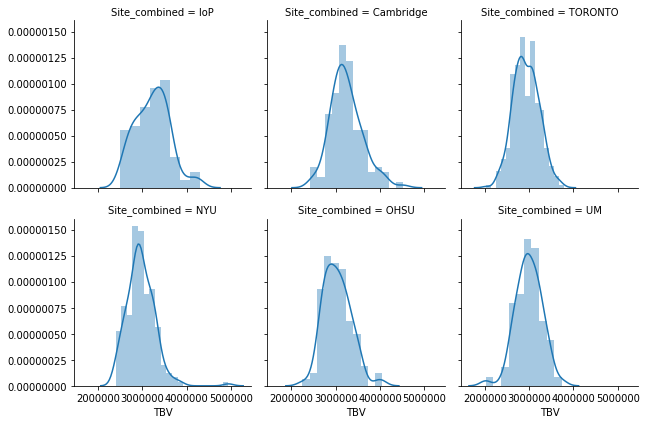

In [12]:
strvol_fg = sns.FacetGrid(data,col='Site_combined',col_wrap=3)
strvol_fg.map(sns.distplot,"TBV")

In [13]:
def plot_distributions(data, subset_col, display_col):
    for sub in data[subset_col].unique():
        subset=data[data[subset_col] == sub]
        sns.distplot(subset[display_col],hist=False, kde=True, label=sub)

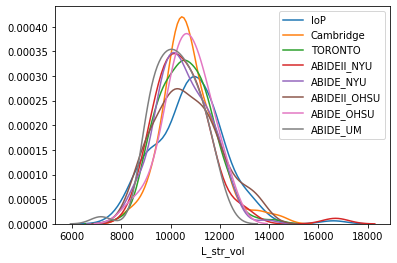

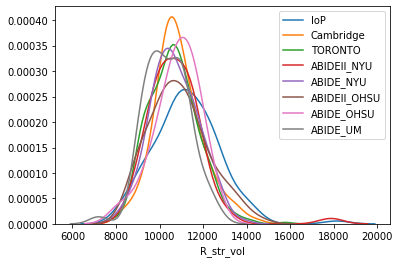

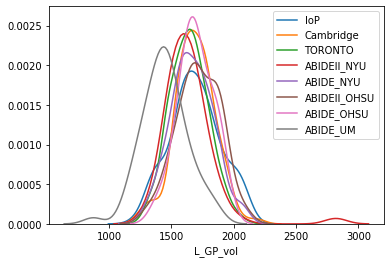

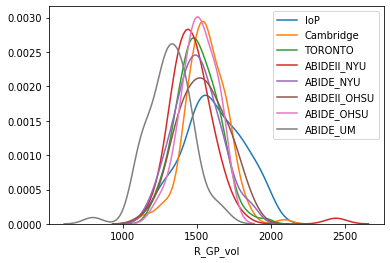

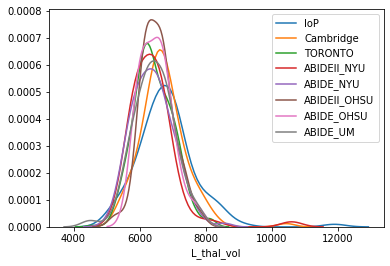

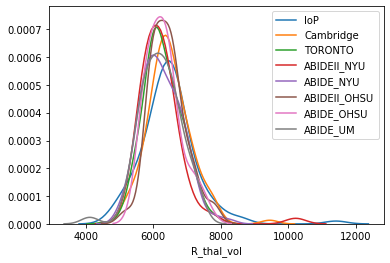

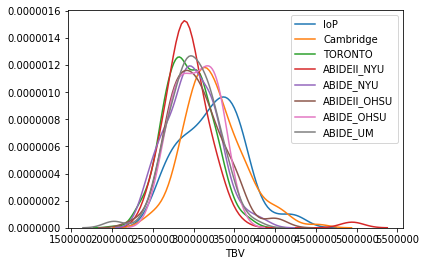

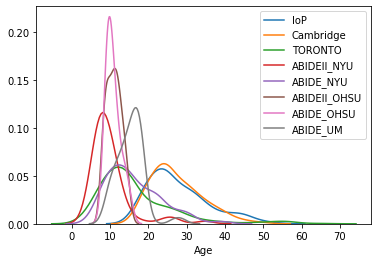

In [14]:
for struct in ['L_str_vol', 'R_str_vol', 'L_GP_vol', 'R_GP_vol', 'L_thal_vol', 'R_thal_vol','TBV','Age']:
    plt.figure()
    plot_distributions(data, "Site", struct)


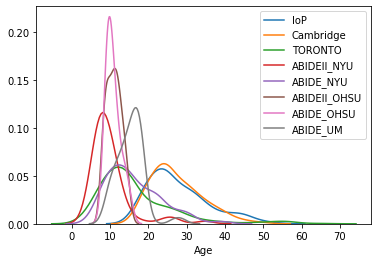

In [15]:
plot_distributions(data, "Site", "Age")

In [16]:
# Map site IDs to integers, as required by neuroCombat()
sites = data['Site'].unique()
print(sites)
site_dict = dict(zip(sites, range(1, len(sites)+1)))
print(site_dict)
data['Site_no'] = data['Site'].map(site_dict)
print(data.tail())
data['Site'].map(site_dict)

['IoP' 'Cambridge' 'TORONTO' 'ABIDEII_NYU' 'ABIDE_NYU' 'ABIDEII_OHSU'
 'ABIDE_OHSU' 'ABIDE_UM']
{'IoP': 1, 'Cambridge': 2, 'TORONTO': 3, 'ABIDEII_NYU': 4, 'ABIDE_NYU': 5, 'ABIDEII_OHSU': 6, 'ABIDE_OHSU': 7, 'ABIDE_UM': 8}
          AAL_ID        Subject_ID     Site_ID      Site Site_combined  \
1001  UM_2_50404  ABIDE_UM_2_50404  ABIDE_UM_2  ABIDE_UM            UM   
1002  UM_2_50405  ABIDE_UM_2_50405  ABIDE_UM_2  ABIDE_UM            UM   
1003  UM_2_50424  ABIDE_UM_2_50424  ABIDE_UM_2  ABIDE_UM            UM   
1004  UM_2_50426  ABIDE_UM_2_50426  ABIDE_UM_2  ABIDE_UM            UM   
1005  UM_2_50427  ABIDE_UM_2_50427  ABIDE_UM_2  ABIDE_UM            UM   

                 CIVET_ID Subject Project  DX_Group       DX  ...  R_str_vol  \
1001  ABIDE_UM_2_50404_t1   50404   ABIDE         1      ASD  ...    7198.38   
1002  ABIDE_UM_2_50405_t1   50405   ABIDE         1      ASD  ...   11376.40   
1003  ABIDE_UM_2_50424_t1   50424   ABIDE         2  Control  ...   10109.40   
1004  ABIDE_U

0       1
1       1
2       1
3       1
4       1
       ..
1001    8
1002    8
1003    8
1004    8
1005    8
Name: Site, Length: 1006, dtype: int64

In [17]:
#features = ['L_str_vol', 'L_GP_vol', 'L_thal_vol',
#       'R_str_vol', 'R_GP_vol', 'R_thal_vol', 'CSF', 'GM', 'WM', 'TBV']
features = ['L_str_vol', 'L_GP_vol', 'L_thal_vol',
       'R_str_vol', 'R_GP_vol', 'R_thal_vol']
sites
harmonized_features = nc.neuroCombat(data[features].transpose(), covars=data[['Site_no', 'Age', 'DX']], batch_col='Site_no', categorical_cols=[], continuous_cols=[]).transpose()
harmonized_features.shape
harmonized_features = pd.DataFrame(harmonized_features)
harmonized_features.columns = features
harmonized_features['Site'] = data['Site']
print(harmonized_features)
print(data[features])

[neuroCombat] Creating design matrix
[neuroCombat] Standardizing data across features
[neuroCombat] Fitting L/S model and finding priors
[neuroCombat] Finding parametric adjustments
[neuroCombat] Final adjustment of data
         L_str_vol     L_GP_vol   L_thal_vol     R_str_vol     R_GP_vol  \
0     10260.601515  1730.251407  6397.926470  10257.780410  1596.048831   
1     11869.616403  1794.742858  7414.132527  12093.571792  1695.234117   
2     11218.005399  1933.399476  7229.299206  11311.501178  1797.543350   
3     11221.207419  1775.395423  7411.114840  11869.675700  1630.412237   
4      9713.856656  1556.124491  6337.572733   9816.251054  1439.070542   
...            ...          ...          ...           ...          ...   
1001   7133.478064  1077.364057  4462.375478   7223.262628   964.547028   
1002  11821.125001  2064.310085  6821.606762  11944.293571  1898.457096   
1003  10286.892083  1629.695989  7147.456218  10512.623670  1673.969238   
1004  11929.808365  1675.7161

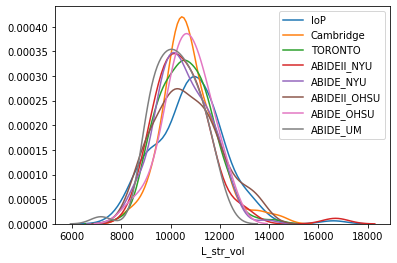

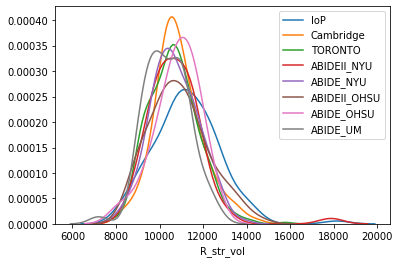

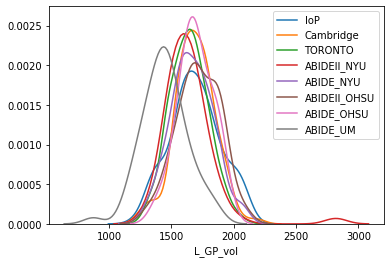

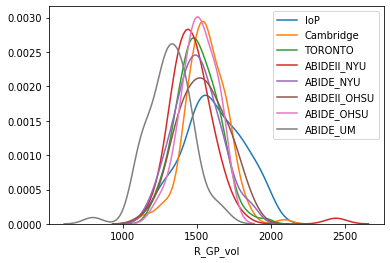

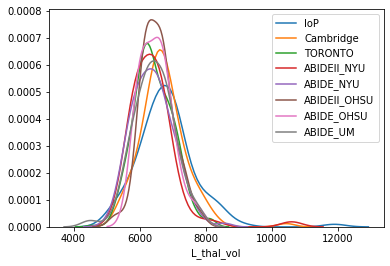

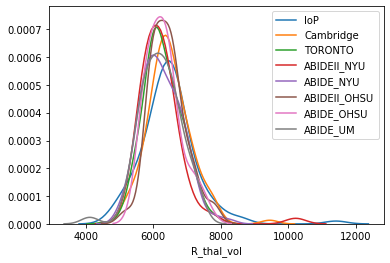

In [18]:
for struct in ['L_str_vol', 'R_str_vol', 'L_GP_vol', 'R_GP_vol', 'L_thal_vol', 'R_thal_vol']:
    plt.figure()
    plot_distributions(data, "Site", struct)

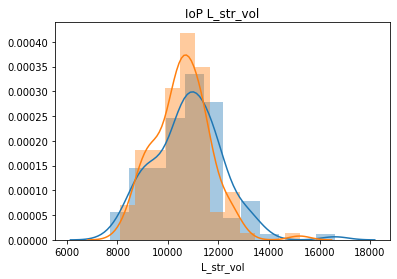

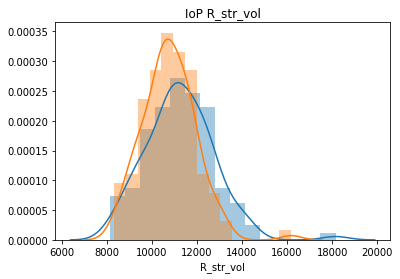

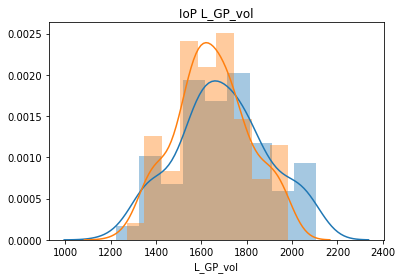

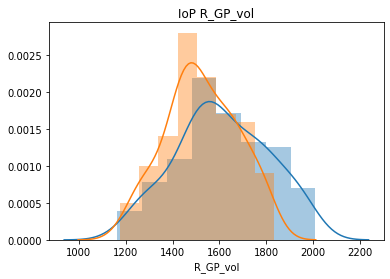

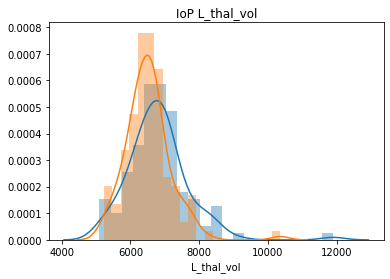

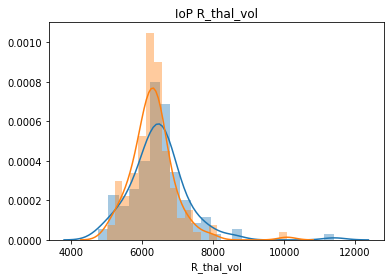

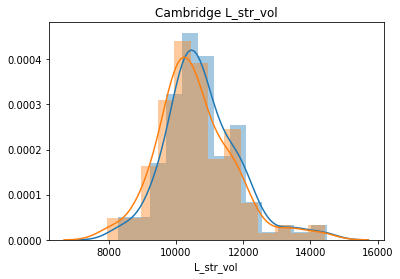

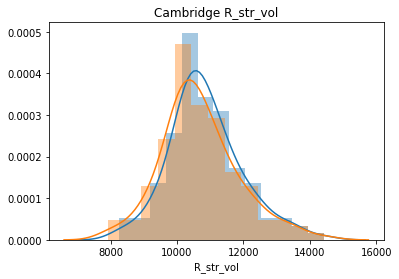

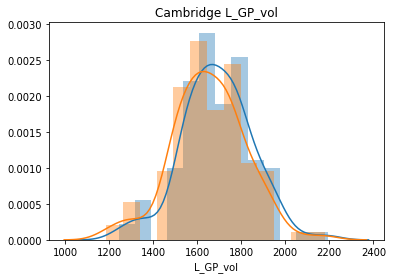

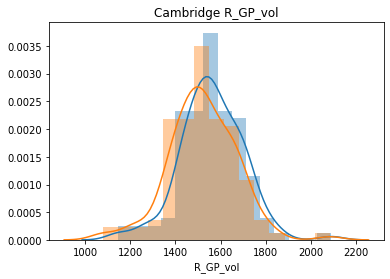

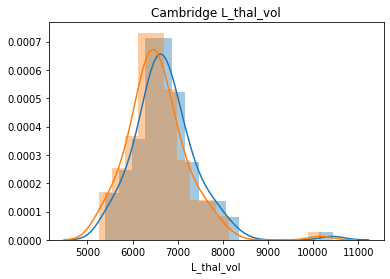

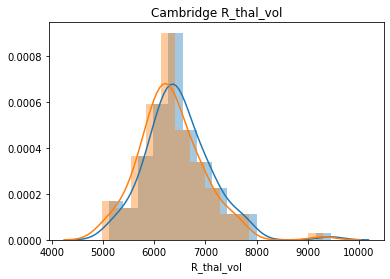

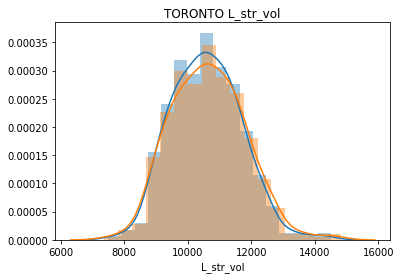

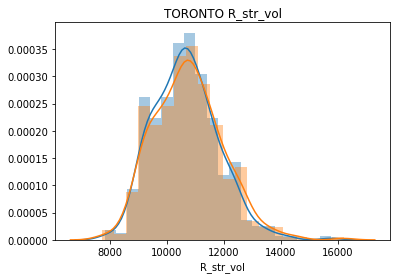

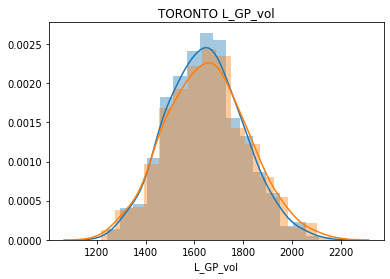

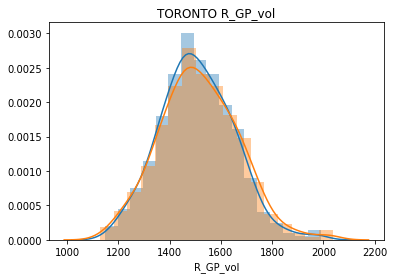

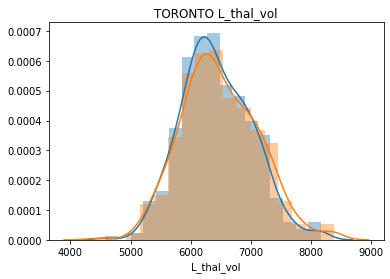

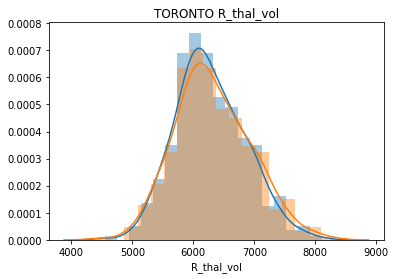

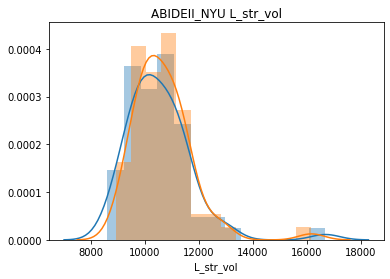

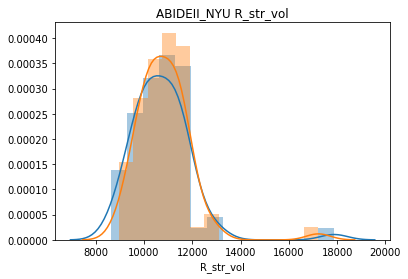

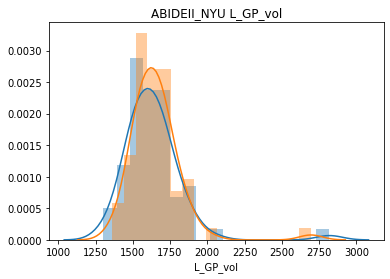

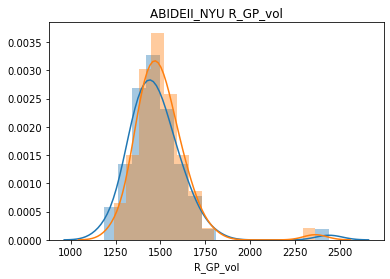

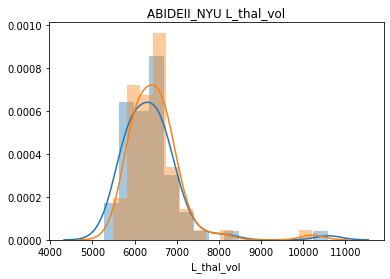

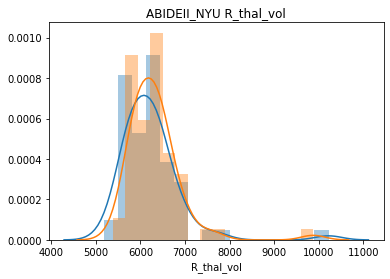

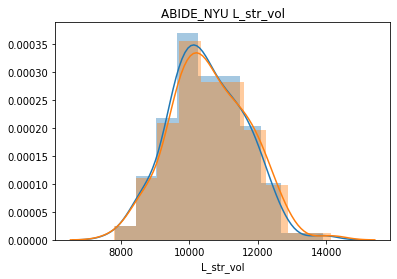

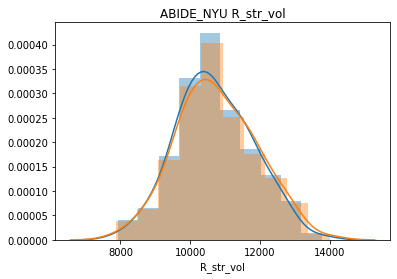

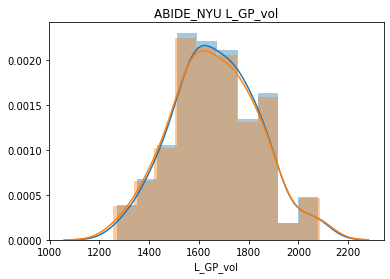

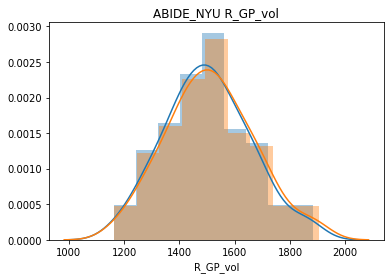

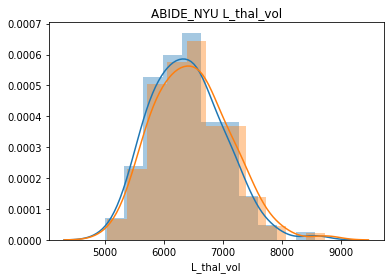

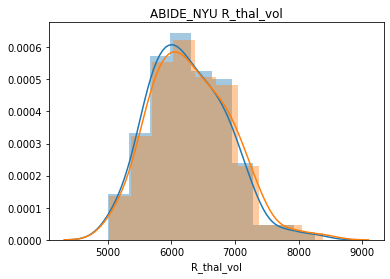

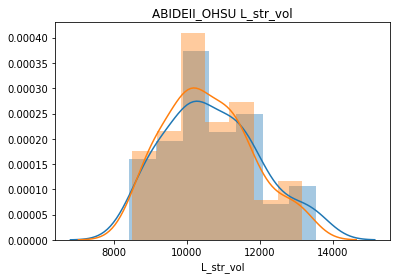

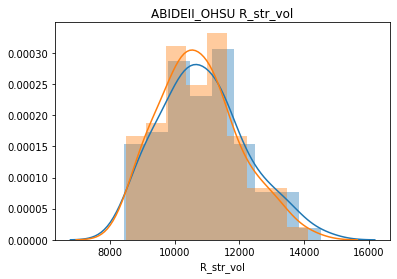

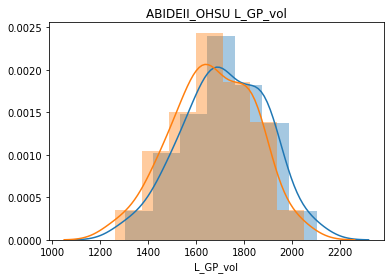

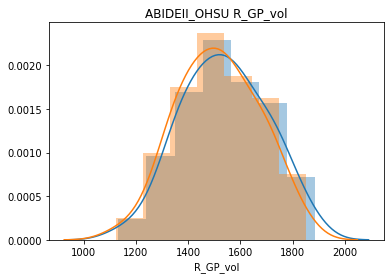

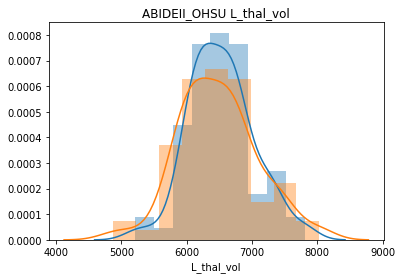

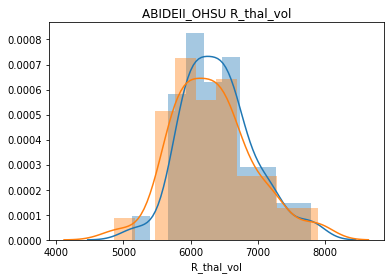

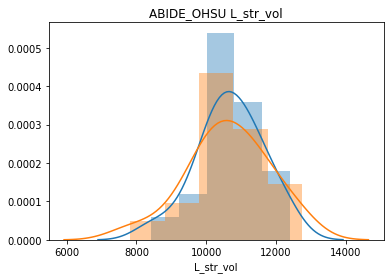

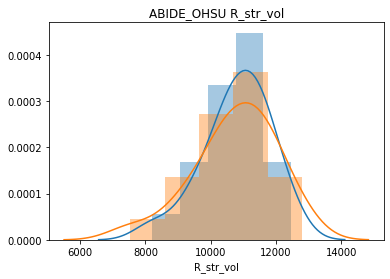

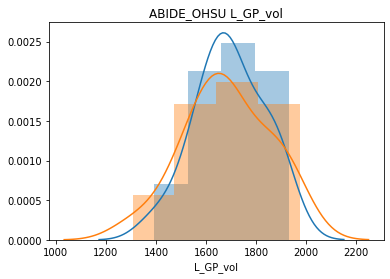

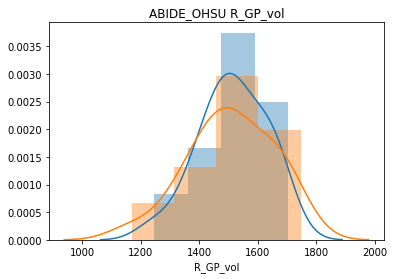

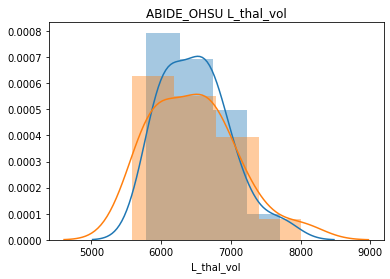

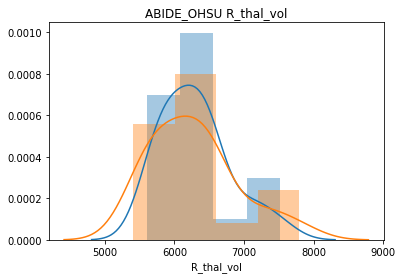

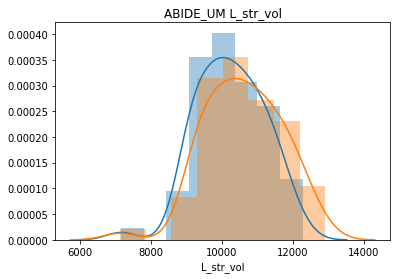

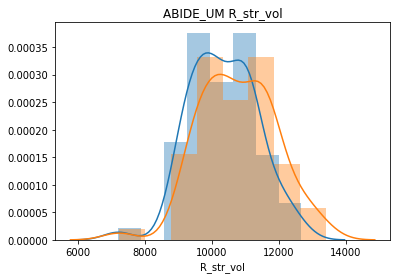

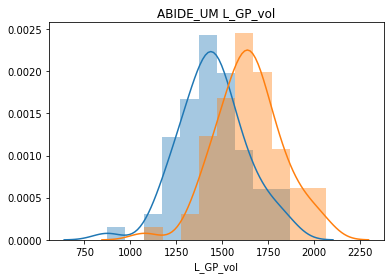

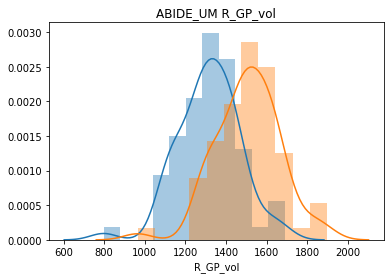

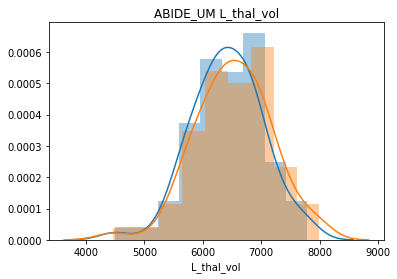

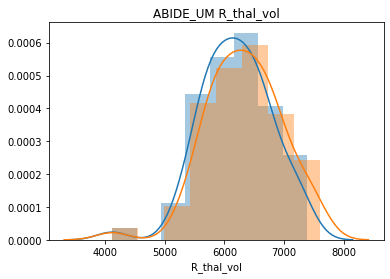

In [19]:
for site in sites:
    for struct in ['L_str_vol', 'R_str_vol', 'L_GP_vol', 'R_GP_vol', 'L_thal_vol', 'R_thal_vol']:
        plt.figure()
        ax = sns.distplot(data[data['Site']==site][struct],hist=True,kde=True,label='Original')
        sns.distplot(harmonized_features[harmonized_features['Site'] == site][struct],hist=True,kde=True,label='Harmonized')
        ax.set_title(site + " " + struct)
        plt.show()

In [20]:
ax.get_title()

'ABIDE_UM R_thal_vol'

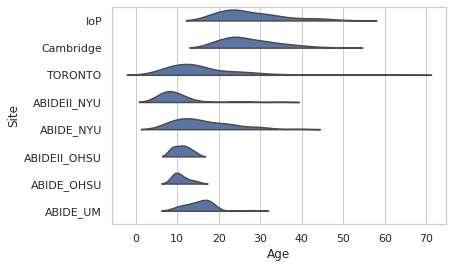

In [101]:
# Plot the distributions of ages across all sites. Hacky solution to get seaborn to display half a violin plot.
sns.set(style = 'whitegrid')
vp_age_data = pd.DataFrame({'idx': data.index, 'Site': data['Site'], 'Age': data['Age'], 'hue_class': 0})
vp_age_data['hue_class'].loc[-1] = 999
ax_vp = sns.violinplot(y = 'Site', x = 'Age', data = vp_age_data, hue = 'hue_class', split = True, scale = 'count', legend=False)
ax_vp.legend().remove()